# Simple EDA
Exploratory Data Analysis for Climate Misinformation dataset
20210324


In [1]:
import os
import logging
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
assert tuple(int(el) for el in sns.__version__.split('.')) >= (0, 11, 0), 'You need Seaborn >= 0.11'


# read dataset

In [3]:

# later, I think data should be taken from Google Cloud Platform => https://cloud.google.com/docs/authentication/end-user 
# for the moment look with file saved in github

DATA_DIR = os.path.join('..', 'labelled_data') 
DATASET = os.path.join(DATA_DIR, 'labelled_data_14032021.csv')
df = pd.read_csv(DATASET, header=0)


# Do some cleansing and add some metrics

In [4]:
# remove double white spaces
df.text = df.text.replace('\s+', ' ', regex=True)

# text length
df['text_len'] = df.text.str.len()
df['word_count'] = df.text.str.count(' ') + 1

# for prettier plots, indicate label is a category
# df.label = df.label.astype('category')

# convert labels
    # - 118: climate denying
    # - 119: not climate denying
    # - 120: not climate related
labels = {
    118: 'climate denying',
    119: 'not climate denying',
    120: 'not climate related'
}
df.label = df.label.apply(lambda x: labels[x] if x in labels else 'other')


# describe is always useful

In [5]:
df.describe()

,id,meta,user,text_len,word_count
count,778.000000,183.000000,778.0,716.000000,716.000000
mean,713.947301,1098.114754,1.0,4403.241620,705.215084
std,218.349657,1006.582562,0.0,3453.220823,543.095872
min,333.000000,5.000000,1.0,88.000000,8.000000
25%,522.250000,326.000000,1.0,2436.000000,378.000000
50%,711.500000,922.000000,1.0,3923.500000,630.500000
75%,901.750000,1522.000000,1.0,5290.000000,861.250000
max,1104.000000,4309.000000,1.0,32969.000000,4674.000000


# class balance

In [6]:
df['label'].value_counts()


climate denying        244
not climate related    221
not climate denying    163
other                  150
Name: label, dtype: int64

# text lengths and word counts by class

In [7]:
# for col in ['text_len', 'word_count']:
#     sns.displot(x=col, data=df[[col, 'label']], hue='label', height=10, aspect=2)
#     plt.show()

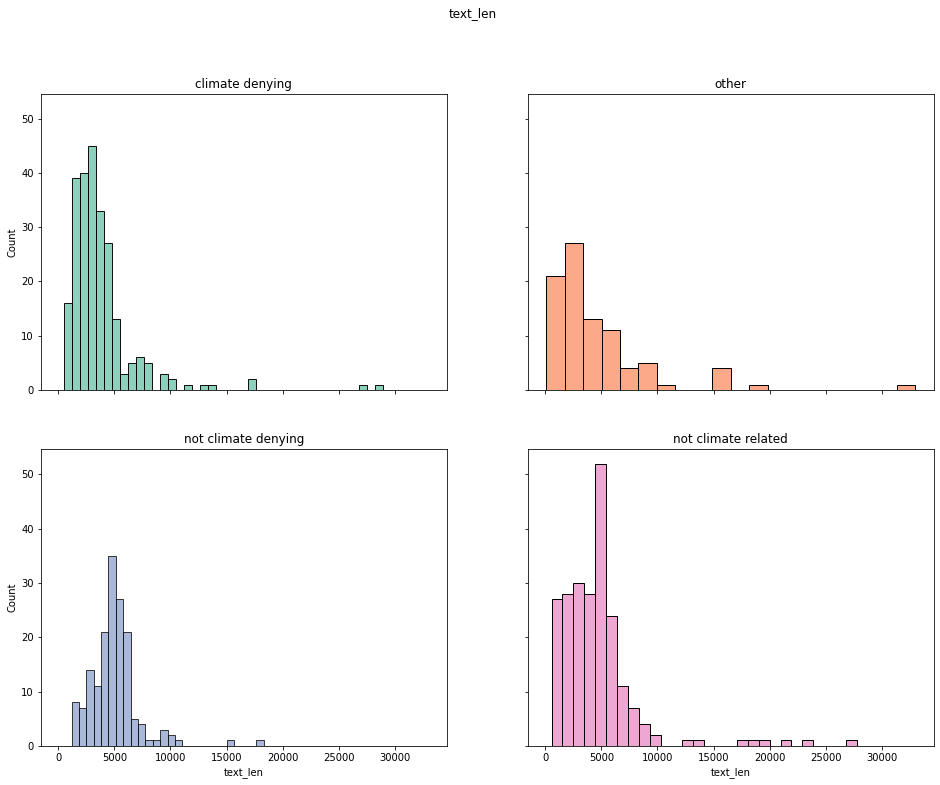

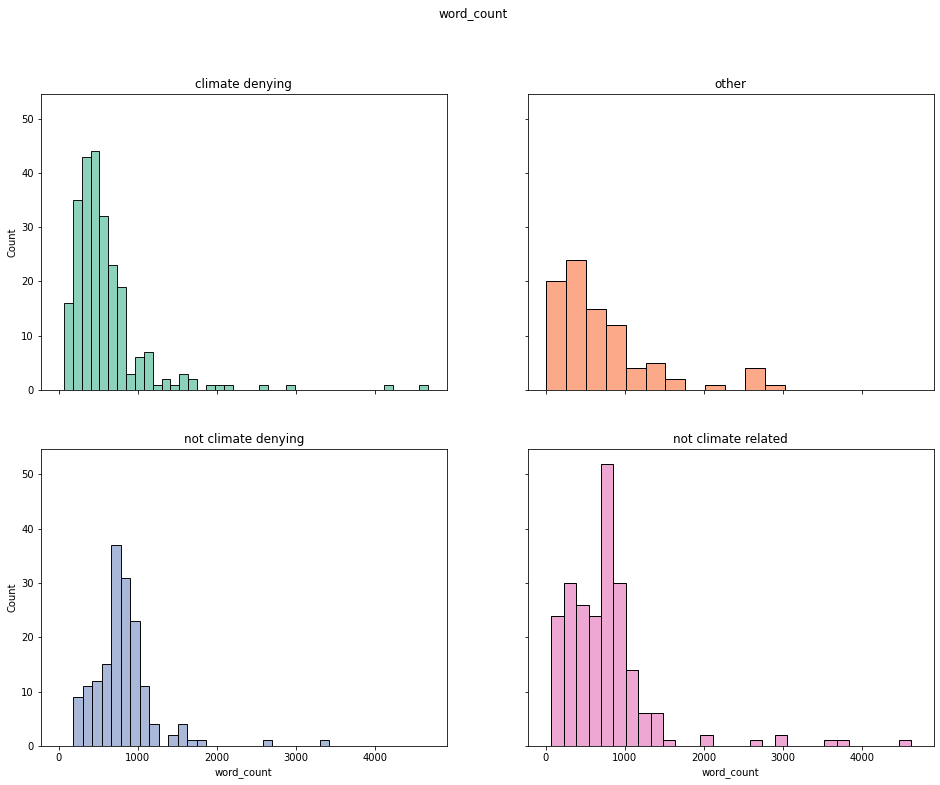

In [8]:
palette = sns.color_palette("Set2")
for col in ['text_len', 'word_count']:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
    plt.suptitle(col)
    for idx, cat in enumerate(df.label.unique()):
        ax = axes[idx//2, idx%2]
        sns.histplot(x=col, data=df[df.label == cat][[col]], label=cat, ax=ax, color=palette[idx])
        ax.set_title(cat)
        # plt.legend(loc='best')
    plt.show()

Distributions between the classes in terms of length of text and word counts are dissimilar

There are more "climate denying" 'shorter' texts than for the other classes. 